# Explanatory Data Analysis - Visualization
(by Tevfik Aytekin)

In [28]:
#import utils
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import tkinter
from matplotlib.backends.backend_tkagg import (
    FigureCanvasTkAgg, NavigationToolbar2Tk)
# Implement the default Matplotlib key bindings.
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure
from sklearn.neighbors import KernelDensity
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['figure.figsize'] = [4.5, 3.5]
#plt.rcParams['figure.dpi'] = 100



%matplotlib inline
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 100

In [31]:
# load train.csv file from Kaggle "House Prices: Advanced Regression Techniques" dataset 
house = pd.read_csv("../datasets/house_prices/train.csv")
#house = pd.read_csv("train.csv")
# print first 10 houses
house.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [32]:
# Show basic descriptive statistics of columns
house.describe()
# returned value is also a dataframe

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [34]:
# show descriptive statistics of specific columns
house.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

In [35]:
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Bank Marketing Dataset

In [36]:
# from https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

bank = pd.read_csv("../datasets/bank/bank-full.csv", delimiter = ";")
# bank = pd.read_csv("bank-full.csv", delimiter = ";")
# print first 10 examples
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [ ]:
bank.shape

## Making Sense of Data by Visualization

If we have a bunch of data, say a list of values, it might not be easy to understand its properties especially when data is large. For example the following shows some data which contains 1000 numbers. What can we say about this data?

In [37]:
data = list(np.random.normal(5, 2, 1000)) + list(np.random.normal(20, 3, 2000))
np.random.shuffle(data)
print(data)

[20.344237990128224, 21.93296438030941, 19.860751064950687, 19.821460587827403, 23.85325436248183, 17.144495785331483, 13.266992488080003, 17.763608781955746, 4.979744055404756, 7.5792424450888625, 18.280273813239308, 23.117728402185325, 7.506708970185407, 17.70774624275638, 3.3690111645425227, 18.199244228198236, 6.691047123993558, 24.12022202563093, 19.082362012067428, 25.550994036222306, 16.827151143857158, 16.84273101934449, 1.457634806837114, 18.847724949901487, 4.944795550218205, 22.76841074663203, 23.170729791706783, 19.50580369258836, 18.313578542863485, 14.862037593511715, 25.149652856775432, 4.06979622512444, 24.845517625586773, 20.40003325236969, 23.398224496513723, 21.381470241544555, 3.1378834445752766, 19.25409454485716, 4.757132693851331, 22.188381378868968, 22.780391935743168, 6.5243026330585, 19.847833789154468, 20.470759435315074, 20.869659096332285, 19.229778578110924, 23.624236441946156, 22.655542295810704, 5.297792680410485, 19.617936541297873, 22.408860904568606, 

### Summary Statistics

We can look at simple summary statistics such as min, max, mean, and standard deviation. Summary statics will not give us all the information such as the distribution of values.

In [38]:
print("Min: ",np.min(data))
print("Max: ", np.max(data))
print("Mean :",np.mean(data))
print("Std. Dev.:",np.std(data))

Min:  -1.444051257772771
Max:  28.75057868289975
Mean : 14.99887542087543
Std. Dev.: 7.533291448460132


### Univariate Plots for Numeric Data

### Univariate Scatter Plots
### Strip Plot

These plots will show all of the data which might be useful if the data size is not large, for large datasets data points will overlap and make it difficult to understand the distribution of data. In the plot below, we can see that there are two clusters of data points however the distribution of the values are not clear.

**Question**: What are the roles of the alpha and jitter parameters?

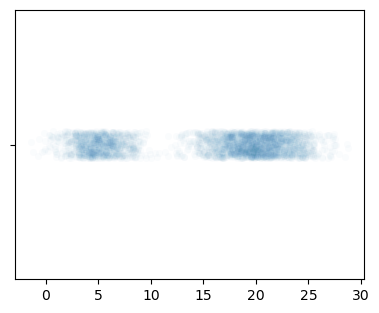

In [39]:
sns.stripplot(data=data, orient="h", alpha=0.02, jitter=0.05);

### Swarm Plot

Similar to Strip plot but prevents overlapping. This can we useful when the number of samples is small. Also the final result depends on the layout algorithm used. Following data might the grades of 50 students from an exam.

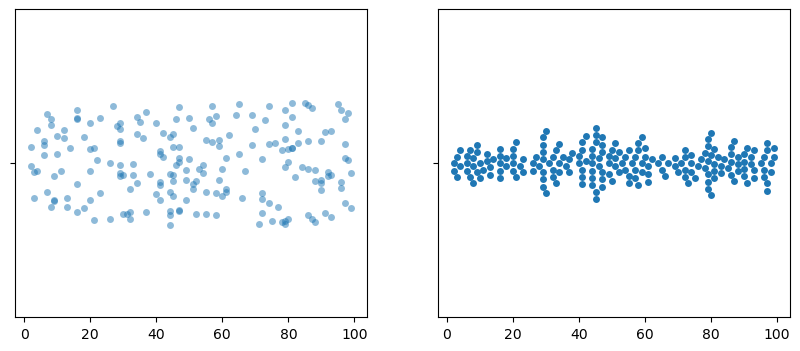

In [40]:
f, axarr = plt.subplots(1,2)
f.set_size_inches(10,4)
data = np.random.randint(1,100,200)
sns.stripplot(data=data, orient="h", alpha=0.5, jitter=0.2, ax=axarr[0] );
sns.swarmplot(data=data, orient="h", ax=axarr[1] );


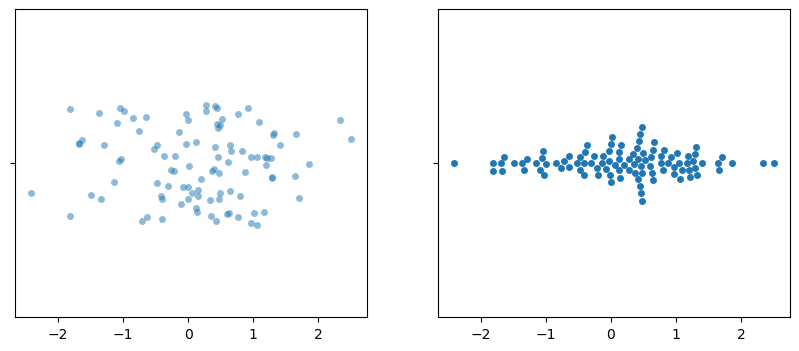

In [180]:
f, axarr = plt.subplots(1,2)
f.set_size_inches(10,4)
data = np.random.normal(size=100)
sns.stripplot(data=data, orient="h", alpha=0.5, jitter=0.2, ax=axarr[0] );
sns.swarmplot(data=data, orient="h", ax=axarr[1] );

### IRIS Dataset

In [181]:
iris = datasets.load_iris()
iris = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


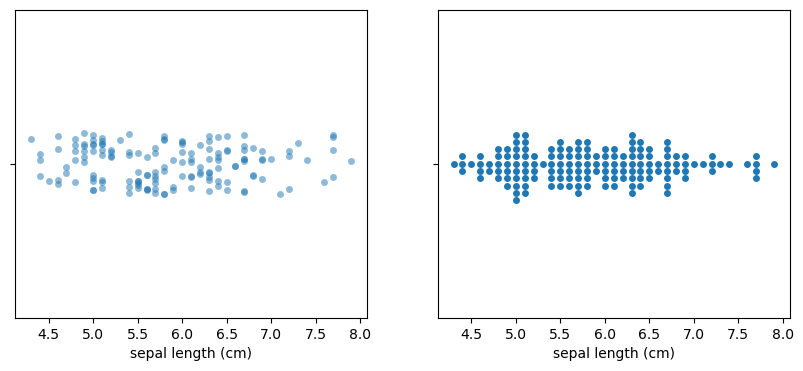

In [182]:

f, axarr = plt.subplots(1,2)
f.set_size_inches(10,4)
sns.stripplot(data=iris["sepal length (cm)"], orient="h", alpha=0.5, jitter=0.1, ax=axarr[0] );
sns.swarmplot(data=iris["sepal length (cm)"], orient="h", ax=axarr[1] );


### Histogram

Histograms are one of the most popular visualizations for understanding the distribution of data. It splits the data into equal sized bins and shows the count of values that falls into each bin with bars. However, the result is dependent on the number of bins. For example, if you look at the right most figure below, the distribution of the data is not correctly reflected. **One solution to this problem is to plot histograms with different number of bins for the same data.**

Text(0.5, 1.0, 'bins=100')

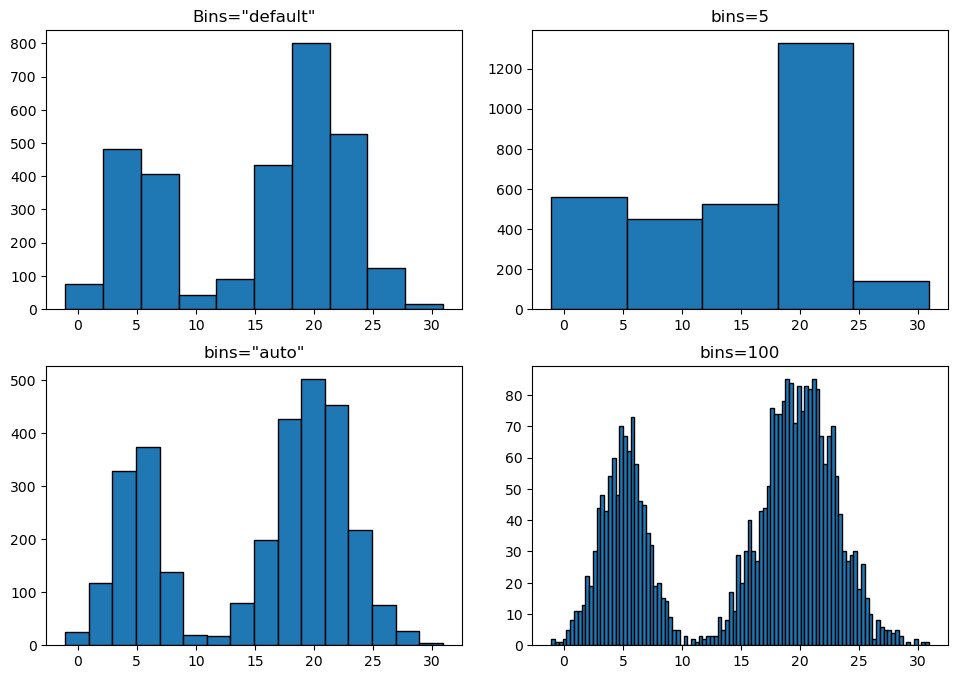

In [157]:
data = list(np.random.normal(5, 2, 1000)) + list(np.random.normal(20, 3, 2000))

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(10, 7)
fig.tight_layout(pad=2.0)
axs[0, 0].hist(data, edgecolor='black')
axs[0, 0].set_title('Bins="default"')
axs[0, 1].hist(data, edgecolor='black', bins = 5)
axs[0, 1].set_title('bins=5')
axs[1, 0].hist(data, edgecolor='black', bins="auto")
axs[1, 0].set_title('bins="auto"')
axs[1, 1].hist(data, edgecolor='black', bins=100)
axs[1, 1].set_title('bins=100')

#### Selecting the number of bins?

There are different methods for selecting the number of bins. The default value in matplotlib is 10, if bin="auto" it uses the maximum of the ‘sturges’ and ‘fd’ estimators. For other estimators see: [histogram_bin_edges](https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges)

**‘fd’ (Freedman Diaconis Estimator)**

$$
bin\_width = 2\frac{IQR}{n^{1/3}}
$$

where $IQR$ is interquartile range, $n$ is the the number of elements. Can be too conservative for small datasets, but is quite good for large datasets. The IQR is very robust to outliers.

**‘sturges’**

$$
number\_of\_bins = \log_2(n)+1
$$

This estimator assumes normality of data and is too conservative for larger, non-normal datasets. 

### Box and Whiskers Plot
Boxplots show the distribution of the values using quartiles. If we sort a set of numbers then the second quartile Q2 (also called the median) is the number which is in the middle position, Q1 is the the middle number between the smallest and the median, Q2 is the middle number netween the median and the largest number.

In a box plot, 
- the line inside the box corresponds to the median of the data 
- the ends of the boxes correspond to quartile Q1 (25% percentile) and Q3 (75th percentile).
- whiskers extend to the points that are not outliers
- outliers (generally) defined to be those data points which below $Q1 - 1.5*IQR$ or above $Q3 + 1.5*IQR$ where IQR is the interquartile range (that is the size of the box)



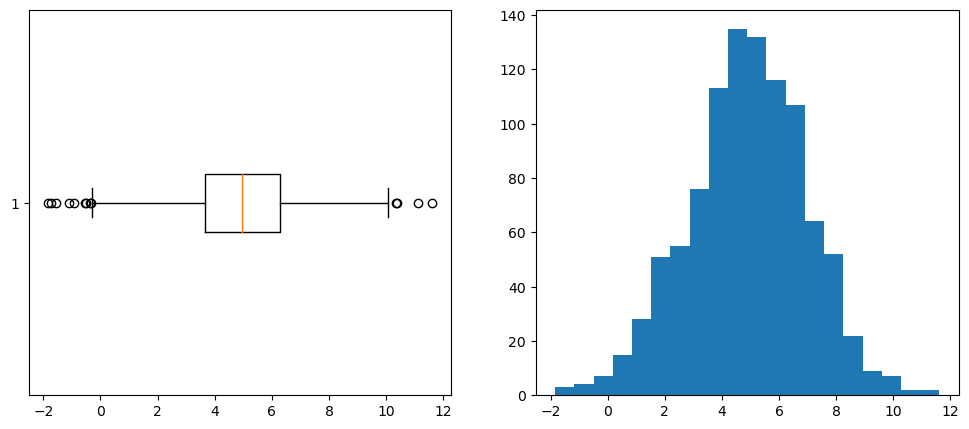

In [158]:
# Generate normally distributed data
data = np.random.normal(5, 2, 1000)
f, axarr = plt.subplots(1,2)
f.set_size_inches(12,5)
axarr[0].boxplot(data, vert=False)
axarr[1].hist(data, 20);

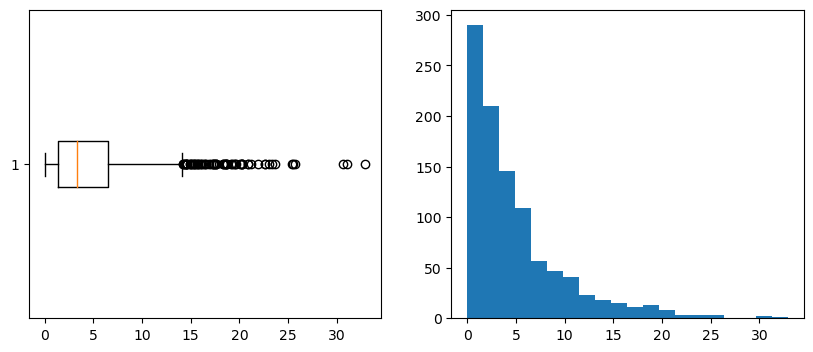

In [159]:
# Generate exponentially distributed data
data = np.random.exponential(5,1000)
f, axarr = plt.subplots(1,2)
f.set_size_inches(10,4)
axarr[0].boxplot(data, vert=False)
axarr[1].hist(data, 20);

### Histogram vs. Boxplot

- In general histograms give more information about the data distribution compared to a boxplot. As you can see in the plots below, from the boxplot it is not possible to see that we have a bimodal distribution (a distribution with two peaks).

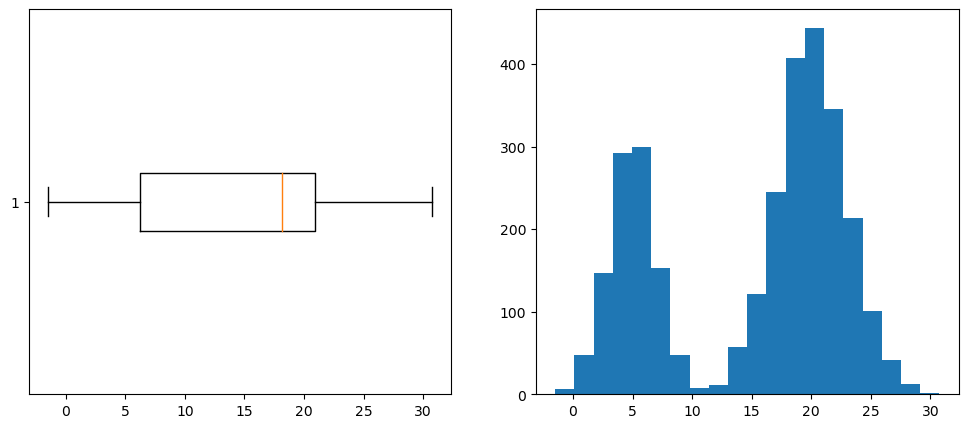

In [160]:
data = list(np.random.normal(5, 2, 1000)) + list(np.random.normal(20, 3, 2000))
f, axarr = plt.subplots(1,2)
f.set_size_inches(12,5)
axarr[0].boxplot(data, vert=False)
axarr[1].hist(data, 20);

- Hovever, with a boxplot you can easily find out the quartiles of the data. For example, in the boxplot below, it is easy to find that the median of the data is around 3, 

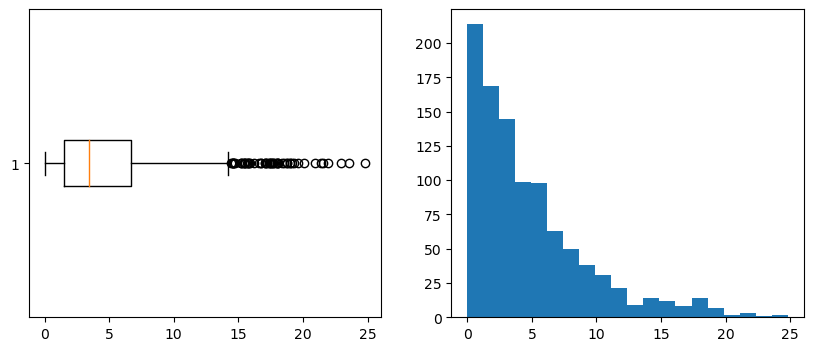

In [162]:
data = np.random.exponential(5,1000)
f, axarr = plt.subplots(1,2)
f.set_size_inches(10,4)
axarr[0].boxplot(data, vert=False)
axarr[1].hist(data, 20);

- Boxplots are more compact and can be used to compare many distributions. Below figure shows 10 different distributions side by side, this is not possible with a histogram.

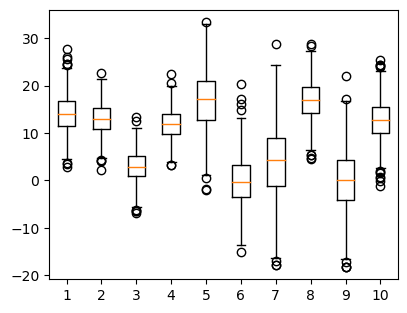

In [163]:
# generate some random data
data = []
for i in range(10):
    mean = np.random.randint(20)
    std = 3 + np.random.randint(5)
    data.append(np.random.normal(mean, std, 1000))
plt.boxplot(data);


Boxplots help us better notice the outliers. It is hard to notice the outlier in the histogram.

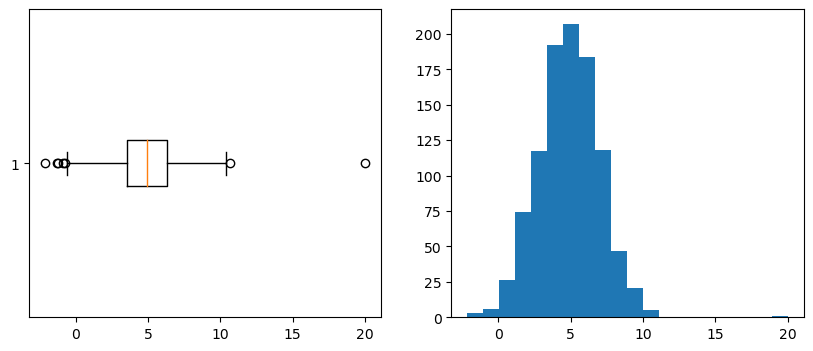

In [164]:
# Generate normally distributed data
data = np.random.normal(5, 2, 1000)
data = np.append(data, 20)
f, axarr = plt.subplots(1,2)
f.set_size_inches(10,4)
axarr[0].boxplot(data, vert=False)
axarr[1].hist(data, 20);

### Kernel Density Estimation


Density estimation is a method for estimating the probability distribution that generated a dataset. A histogram can also be used for this purpose. Below on the left you see a count based histogram whereas on the right there is a probability density. Each bin displays the bin's raw count divided by the total number of counts and the bin width $density = counts / (sum(counts) * np.diff(bins)))$ <br>
so that the area under the histogram integrates to 1 <br>
$np.sum(density * np.diff(bins)) == 1$

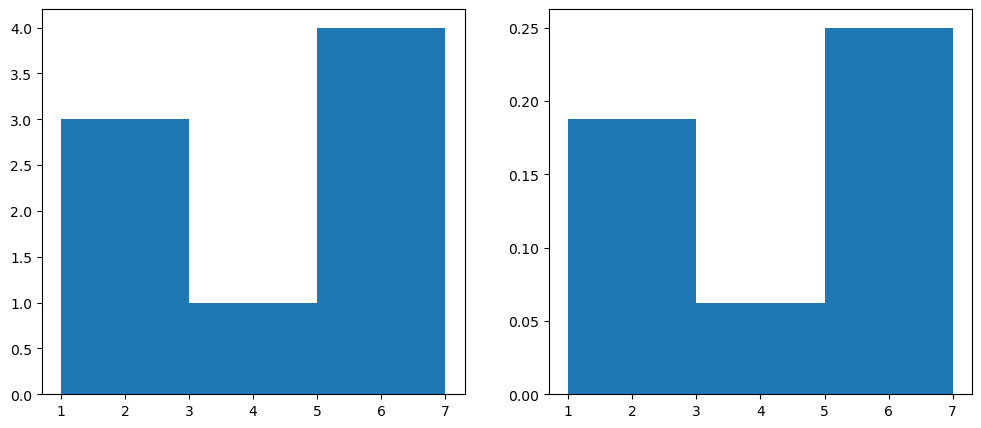

In [4]:
data = np.array([1,2,2,4,5,6,6,7])

f, axarr = plt.subplots(1,2)
f.set_size_inches(12,5)
hist1 = axarr[0].hist(data, bins=3);
hist2 = axarr[1].hist(data, bins=3, density=True);


In [6]:
counts, bins, patches = hist1
density = counts/(sum(counts)*np.diff(bins))
print(counts/(sum(counts)*np.diff(bins)))
print(np.sum(density*np.diff(bins)))

[0.1875 0.0625 0.25  ]
1.0


### Reviewing the problem of histograms

Below figures show two different histograms with the same dataset. As you can see when the cut off point of a bin slighly changes, the resulting histogram can drastically change.

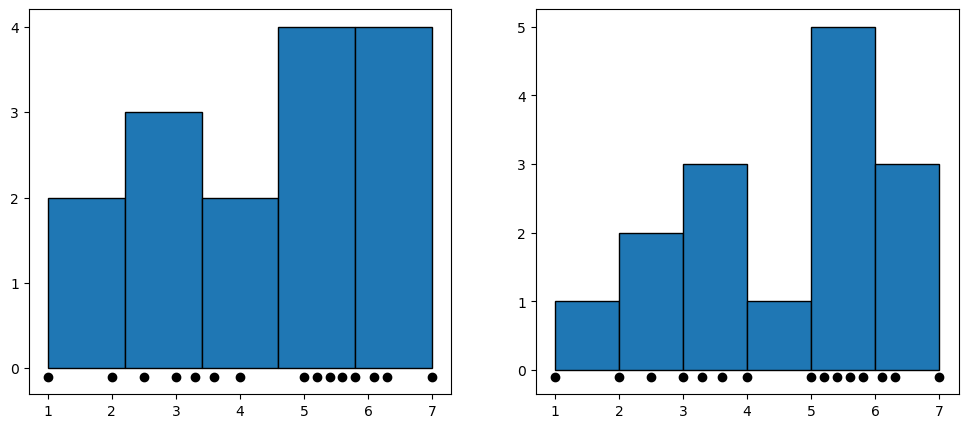

In [42]:
data = np.array([1,2,2.5,3,3.3,3.6,4,5,5.2, 5.4, 5.6, 5.8, 6.1,6.3,7])
x = np.zeros_like(data)-0.1

f, axarr = plt.subplots(1,2)
f.set_size_inches(12,5)
hist1 = axarr[0].hist(data, bins=5, edgecolor="black");
hist2 = axarr[1].hist(data, bins=6, edgecolor="black");
axarr[0].scatter(data,x, color="black")
axarr[1].scatter(data,x, color="black")

### Tophat Kernel

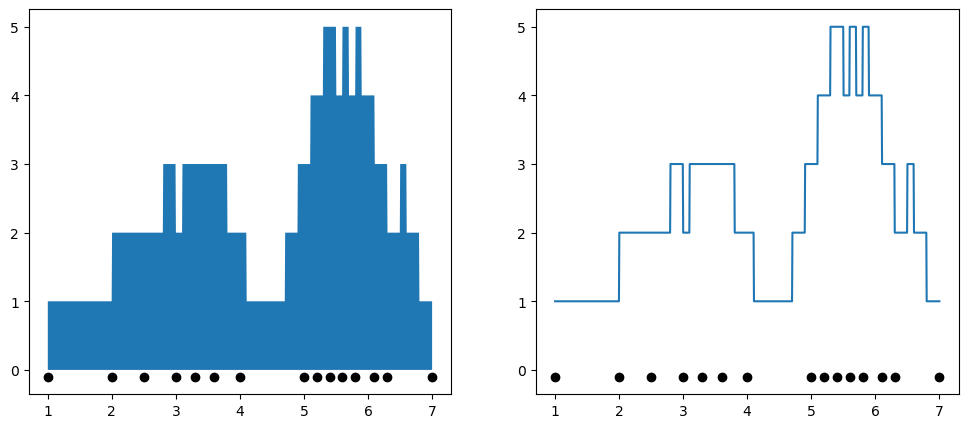

In [49]:
x_d = np.linspace(1, 7, 1000)

density = sum(abs(xi - x_d) < 0.5 for xi in data)
# If a position (x_d) is 0.5 distance within the data then 
# increase the density of that position.

f, axarr = plt.subplots(1,2)
f.set_size_inches(12,5)
axarr[0].fill_between(x_d, density)
axarr[1].plot(x_d, density)
axarr[0].scatter(data,x, color="black")
axarr[1].scatter(data,x, color="black")

### Gaussian Kernel

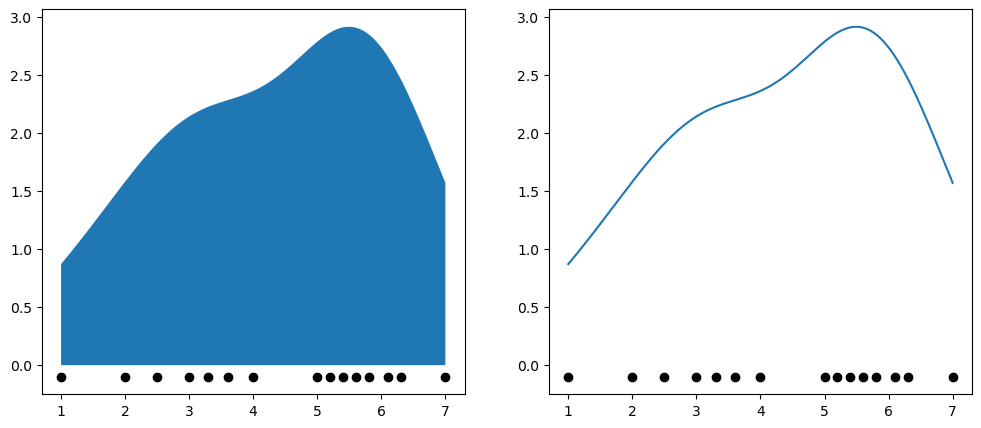

In [50]:
from scipy.stats import norm

x_d = np.linspace(1, 7, 1000)
density = sum(norm(xi).pdf(x_d) for xi in data)

f, axarr = plt.subplots(1,2)
f.set_size_inches(12,5)
axarr[0].fill_between(x_d, density)
axarr[1].plot(x_d, density)
axarr[0].scatter(data,x, color="black")
axarr[1].scatter(data,x, color="black")

### Individual Gaussian Distributions

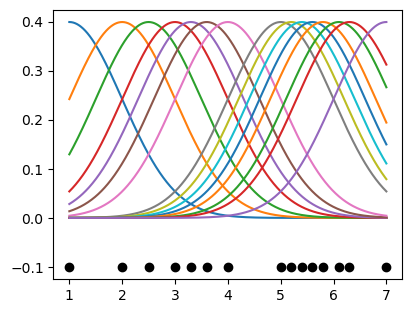

In [51]:
x_d = np.linspace(1, 7, 1000)
for xi in data:
    plt.plot(x_d,norm(xi).pdf(x_d)) 
plt.scatter(data,x, color="black")


Text(0.5, 1.0, 'bins=100')

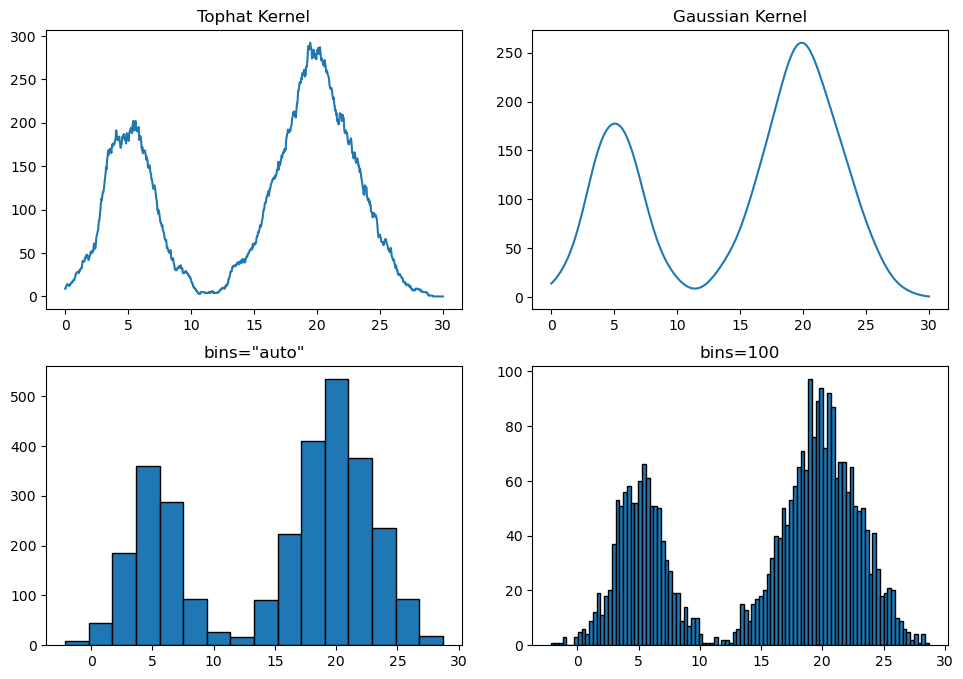

In [53]:
data = list(np.random.normal(5, 2, 1000)) + list(np.random.normal(20, 3, 2000))
np.random.shuffle(data)

from scipy.stats import norm
x = np.linspace(0, 30, 1000)
# Finds the contribution of every value in the data to every point in the given range

def K(xi,x):
    return abs(xi-x)<0.5
def Gaussian_K(xi,x):
    return norm(xi).pdf(x)
    
d_K = sum(K(xi,x) for xi in data)
d_G = sum(Gaussian_K(xi,x) for xi in data)


fig, axs = plt.subplots(2, 2)
fig.set_size_inches(10, 7)
fig.tight_layout(pad=2.0)
axs[0, 0].plot(x,d_K)
axs[0, 0].set_title('Tophat Kernel')
axs[0, 1].plot(x,d_G)
axs[0, 1].set_title('Gaussian Kernel')
axs[1, 0].hist(data, edgecolor='black', bins="auto")
axs[1, 0].set_title('bins="auto"')
axs[1, 1].hist(data, edgecolor='black', bins=100)
axs[1, 1].set_title('bins=100')

### Kernel Density Estimation with sklearn

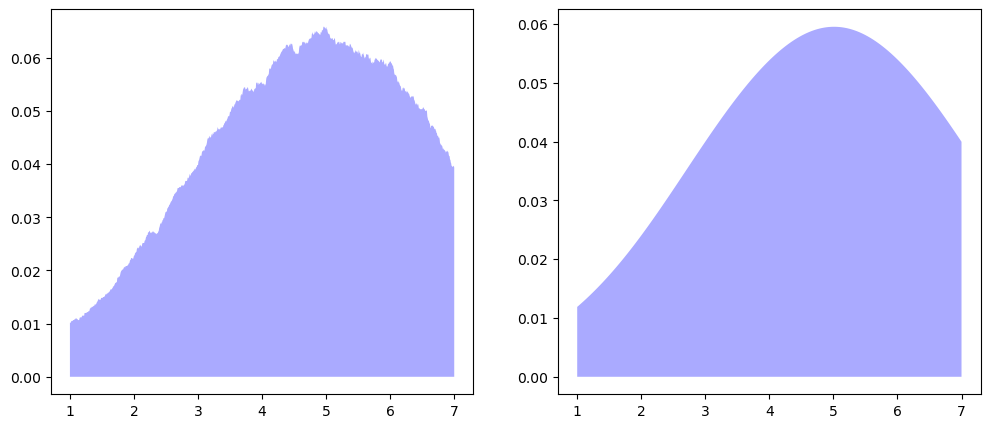

In [55]:
from sklearn.neighbors import KernelDensity
f, axarr = plt.subplots(1,2)
f.set_size_inches(12,5)
x_d = np.linspace(1, 7, 1000)
data = np.array(list(np.random.normal(5, 2, 1000)) + list(np.random.normal(20, 3, 2000)))
X = data.reshape(-1,1)
# tophat KDE
kde = KernelDensity(kernel="tophat", bandwidth=1).fit(X)
X_plot = x_d.reshape(-1,1)
log_dens = kde.score_samples(X_plot)
axarr[0].fill_between(x_d, np.exp(log_dens), fc="#AAAAFF")


kde = KernelDensity(kernel="gaussian", bandwidth=1).fit(X)
X_plot = x_d.reshape(-1,1)
log_dens = kde.score_samples(X_plot)
axarr[1].fill_between(x_d, np.exp(log_dens), fc="#AAAAFF")

### Violin Plots

Violin plots are kernel density estimation plots put vertically. In this way, it is possible to show many violin plots next to each other like box plots. Violin plots show the distribution of the data better than box plots. 

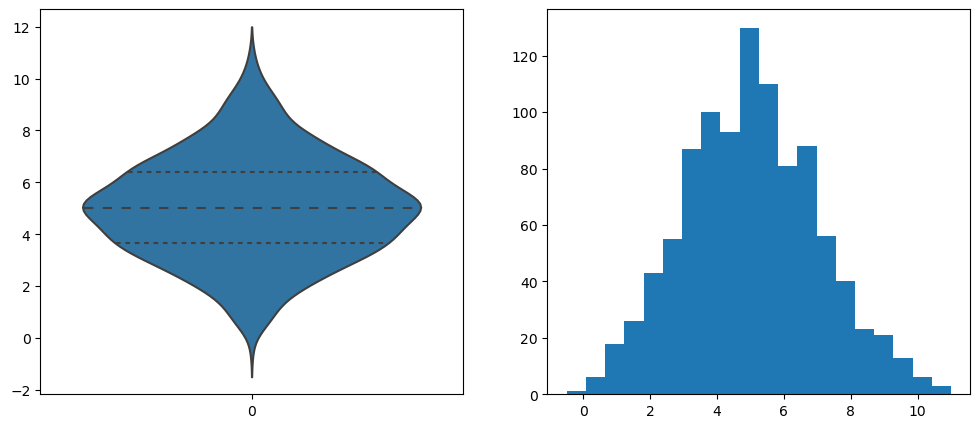

In [59]:
# Generate normally distributed data
data = np.random.normal(5, 2, 1000)
f, axarr = plt.subplots(1,2)
f.set_size_inches(12,5)
sns.violinplot(data, inner="quartile",ax=axarr[0])
axarr[1].hist(data, 20);

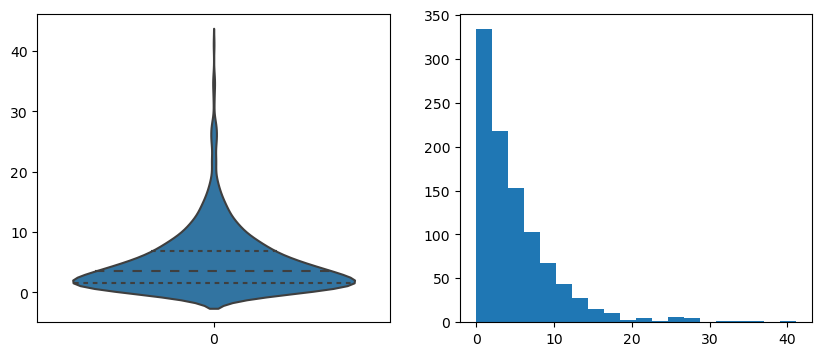

In [57]:
data = np.random.exponential(5,1000)
f, axarr = plt.subplots(1,2)
f.set_size_inches(10,4)
sns.violinplot(data, inner="quartile",ax=axarr[0])
axarr[1].hist(data, 20);

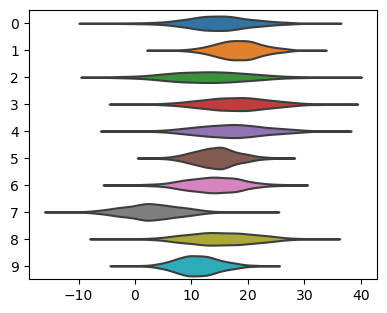

In [189]:
data = pd.DataFrame()
for i in range(10):
    mean = np.random.randint(20)
    std = 3 + np.random.randint(5)
    data[str(i)]=np.random.normal(mean, std, 1000)
sns.violinplot(data, orient="h",inner=None);

### ECDF Plots

Empirical cumulative distribution function (ECDF) plots show the count or proportion of observations falling below each unique value in a dataset. This can be achieved by ordering the data from smallest to the largest. Compared to histograms and boxplots, ECDF plots show all the data and there are no binning or smoothing parameters. The disadvantage is they do not give information about the basic properites of the distribution such as variance, mean, bimodality, etc.

<Axes: ylabel='Proportion'>

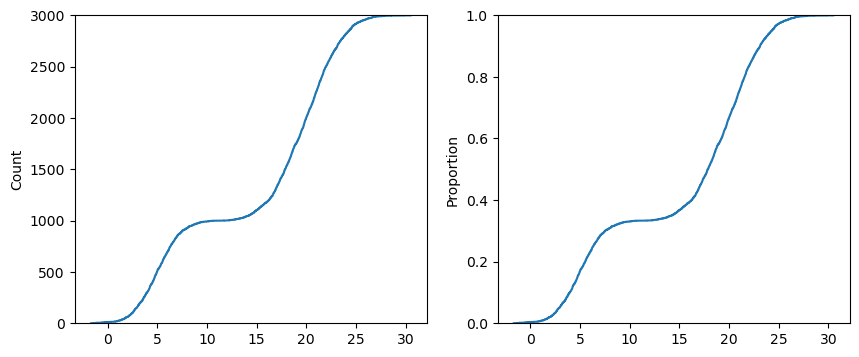

In [190]:
data = list(np.random.normal(5, 2, 1000)) + list(np.random.normal(20, 3, 2000))
f, axarr = plt.subplots(1,2)
f.set_size_inches(10,4)
sns.ecdfplot(data, ax=axarr[0], stat='count')
sns.ecdfplot(data, ax=axarr[1], stat='proportion')

With ECDF plots you can easlily answer questions such as: how many data values are below/above $x$ or what percentage of the data is below/above $x$? For example, for the graph above, you can easily see that there are roughly 1000 data points below 10, or roughly 35% of the data points are below 4.

Since they don't occupy a large space, similar to box plots, multiple ECDF plots can be shown on a single figure.

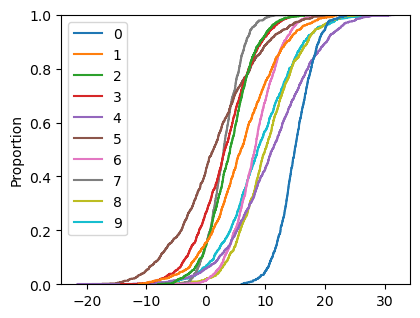

In [191]:
# generate some random data
data = []
for i in range(10):
    mean = np.random.randint(20)
    std = 3 + np.random.randint(5)
    data.append(np.random.normal(mean, std, 1000))
sns.ecdfplot(data);

### Univariate Plots for Categorical Data

### Bar Chart

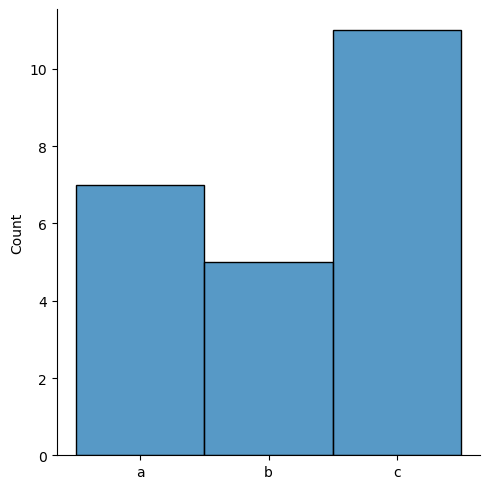

<Figure size 450x350 with 0 Axes>

In [192]:
data = ['a','a','a','a','a','a','a','b','b','b','b','b','c','c','c','c','c','c','c','c','c','c','c']
sns.displot(data);
fig = plt.figure(figsize=(4.5, 3.5))


### Multivariate Plots for Numerical vs. Numerical Data


#### Scatter Plot

We can use scatter plots to look at the relationship between two numeric columns.

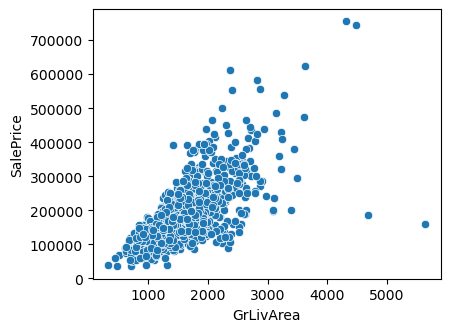

In [193]:
# make a scatter plot showing GrLivarea vs. SalePrice
sns.scatterplot(x=house.GrLivArea, y=house.SalePrice);


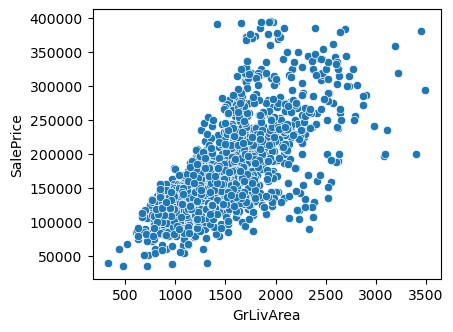

In [194]:
# Drop the outliers and plot again
house2 = house[(house.GrLivArea < 4000) & (house.SalePrice < 400000)]
sns.scatterplot(x=house2.GrLivArea, y=house2.SalePrice);

Adding a 3rd dimension

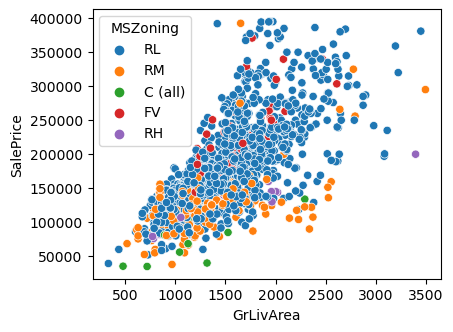

In [195]:
sns.scatterplot(x=house2.GrLivArea, y=house2.SalePrice, hue=house2.MSZoning);

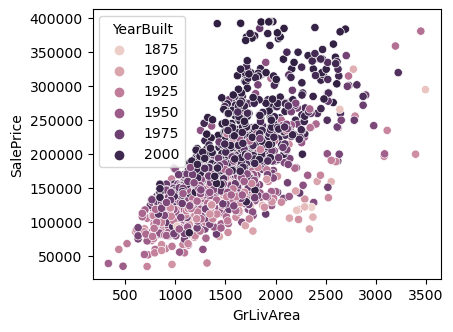

In [196]:
sns.scatterplot(x=house2.GrLivArea, y=house2.SalePrice, hue=house2.YearBuilt);

#### 2D histograms

A 2D histogram bins the data within rectangles and then shows the count of observations within each rectangle with the fill color. In a scatter plot it is not possible to see the density of the regions when we have too many data. 

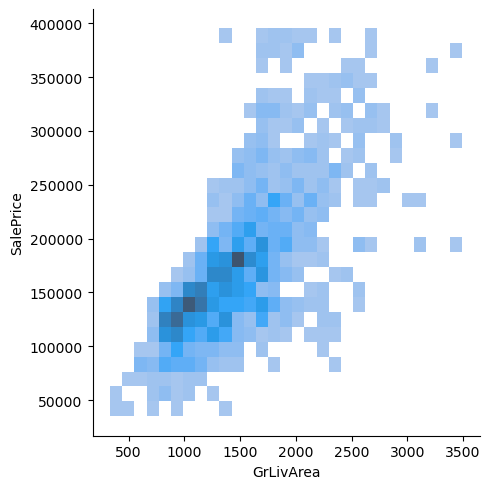

In [197]:
sns.displot(house2, x=house2.GrLivArea, y=house2.SalePrice);

### Multivariate Plots for  Categorical vs. Numerical Data
#### Scatter Plots

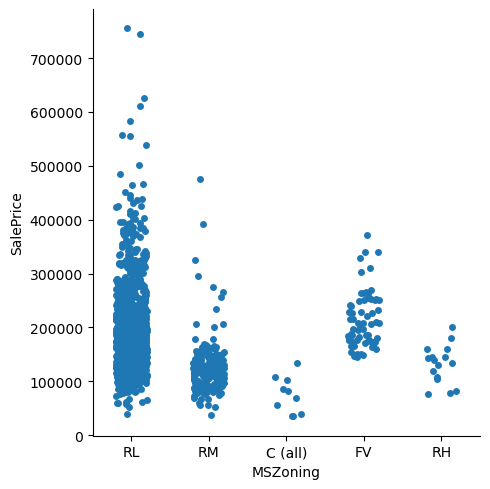

In [198]:
sns.catplot(x='MSZoning', y='SalePrice', data=house, jitter=0.2);
#adjusts the positions of points on the categorical axis with a small amount of random jitter

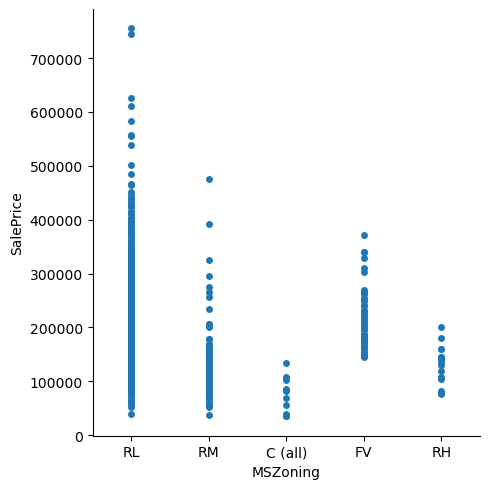

In [199]:
sns.catplot(x='MSZoning', y='SalePrice', data=house, jitter=False);

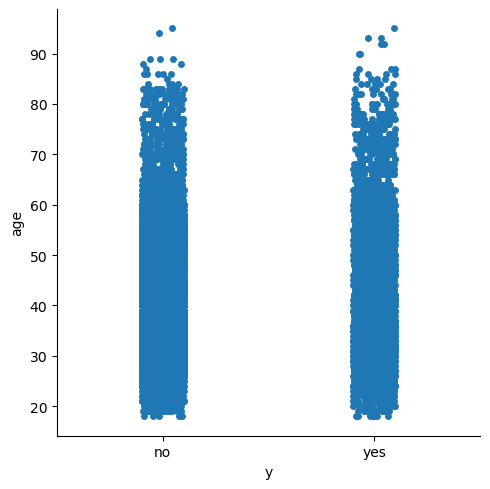

In [200]:
sns.catplot(x='y', y='age', data=bank);

/Users/tevfikaytekin/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 73.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tevfikaytekin/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 51.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tevfikaytekin/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 78.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/tevfikaytekin/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 59.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  

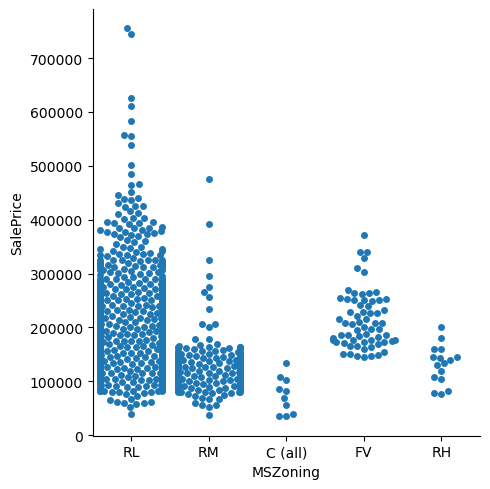

In [201]:
sns.catplot(x='MSZoning', y='SalePrice', data=house, kind="swarm");

#### Box plots

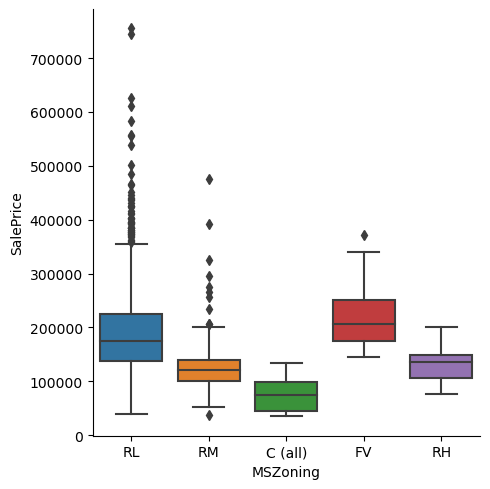

In [202]:
sns.catplot(x='MSZoning', y='SalePrice', kind="box", data=house);

### Zoning Districts 
- RL – Residential Low Density
- RM – Residential Medium Density
- C  – Commercial
- FV – Floating Village Residential
- RH – Residential High Density

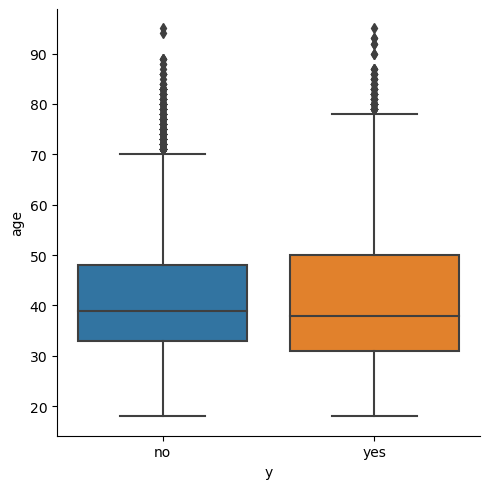

In [203]:
sns.catplot(x='y', y='age', kind="box", data=bank);

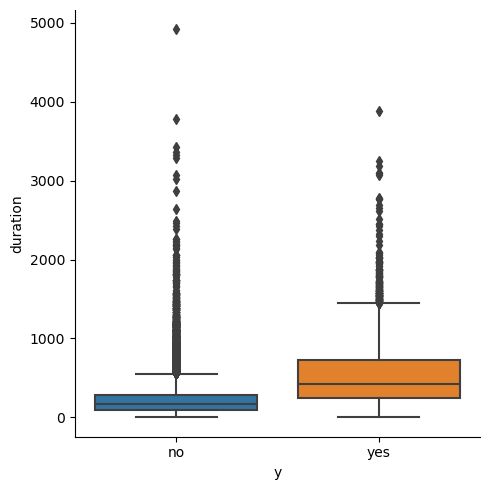

In [204]:
sns.catplot(x='y', y='duration', kind="box", data=bank);

### Categorical vs. Categorical

### Stacked Histogram

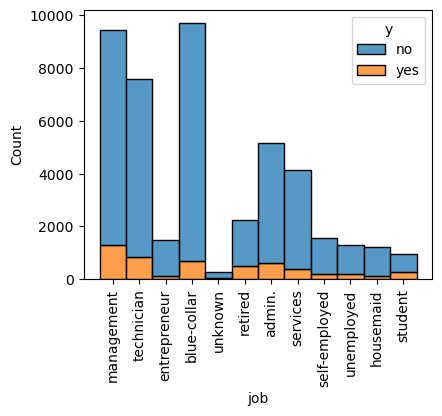

In [205]:
sns.histplot(data=bank, x="job", hue="y", multiple="stack");
plt.xticks(rotation=90);

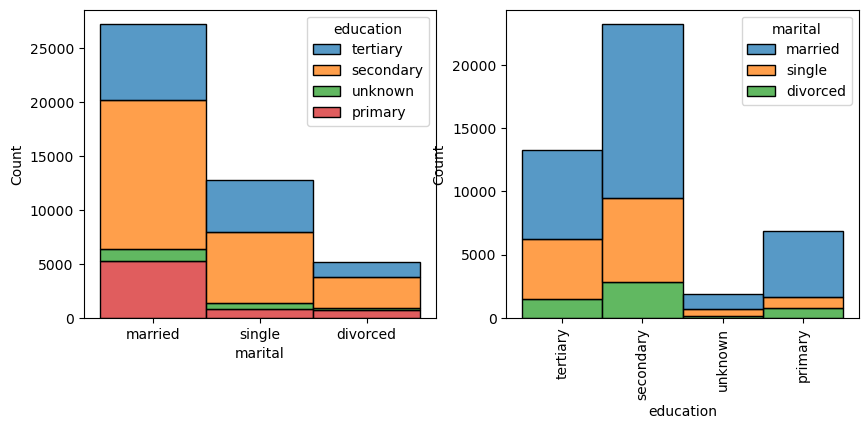

In [206]:
f, axarr = plt.subplots(1,2)
f.set_size_inches(10,4)
sns.histplot(data=bank, x="marital", hue="education", multiple="stack", ax=axarr[0]);
sns.histplot(data=bank, x="education", hue="marital", multiple="stack", ax=axarr[1]);
plt.xticks(rotation=90);
